# Notebook Overview
# Data Exploration

This notebook focuses on data exploration and preparation for sentiment analysis of Yelp reviews.

## Key objectives:
- Data Loading and Initial Assessment
- Distribution Analysis
- Text Analysis
- Preprocessing Pipeline Validation
- Data Quality Assessment
- Feature Analysis

# Cell 1: Imports
This cell imports necessary libraries and modules for data processing, visualization, and model training.
The ``` os.chdir()``` command changes the working directory to the root for relative path consistency.

In [3]:
import os
os.chdir('../')  # Moving up one directory to the root
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from data.data_processing import DataProcessor, TextSignals, SarcasmAugmenter
from utils.dataVisualizer import DataVisualizer
from models.sentiment_model import ModelTrainer

2024-12-31 19:54:38.401420: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Cell 2:  Object Initialization
This cell initializes instances of the following classes :
- DataProcessor : for handling data preprocessing
- DataVisualizer : for handling data visualization
- ModelTrainer : for handling training tasks

In [5]:
dataProcessor = DataProcessor()
dataVisualizer = DataVisualizer(data_processor=dataProcessor)
trainer = ModelTrainer()

# Cell 3: Loading and Initial Analysis
The dataset is loaded, and initial distribution analyses for ratings and sentiments are performed.
This step helps understand the structure and balance of the raw data.

### dataset head output:

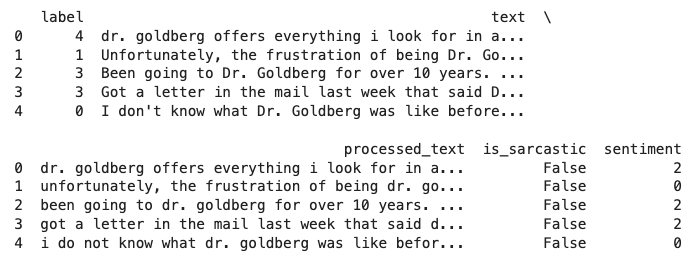


In [7]:
df = dataProcessor.load_data()
print("\nInitial Distribution Analysis:")
dataVisualizer.analyze_ratings_distribution(df)
dataVisualizer.analyze_sentiment_distribution(df)


Initial Distribution Analysis:

Rating Distribution:
Rating 0: 130,000 reviews (20.0%)
Rating 1: 130,000 reviews (20.0%)
Rating 2: 130,000 reviews (20.0%)
Rating 3: 130,000 reviews (20.0%)
Rating 4: 130,000 reviews (20.0%)

Sentiment Distribution:
Negative: 260,000
Neutral: 130,000
Positive: 260,000

Sarcasm Distribution:
Sarcastic: 759
Non-sarcastic: 649,241

Sentiment-Sarcasm Distribution:
Negative:
  Sarcastic: 465
  Non-sarcastic: 259,535
Neutral:
  Sarcastic: 118
  Non-sarcastic: 129,882
Positive:
  Sarcastic: 176
  Non-sarcastic: 259,824


# Cell 4: Data Preparation
This cell prepares a balanced dataset by stratifying classes and splitting the data into training,
validation, and testing sets. Model inputs are also generated for subsequent processing.

In [9]:
data = dataProcessor.prepare_data()
train_df = data['dataframes']['train']
val_df = data['dataframes']['val']
test_df = data['dataframes']['test']
model_inputs = data['model_inputs']

Creating dataset with 1500 samples per class

Creating balanced dataset with:
- 1500 reviews per class
- 600 sarcastic reviews for negative class

Final distribution:

Sentiment 0:
- Total samples: 1500
- Natural sarcasm: 329
- Augmented sarcasm: 271
- Total sarcastic: 600 (40.0%)

Sentiment 1:
- Total samples: 1500
- Natural sarcasm: 75
- Augmented sarcasm: 0
- Total sarcastic: 75 (5.0%)

Sentiment 2:
- Total samples: 1500
- Natural sarcasm: 121
- Augmented sarcasm: 0
- Total sarcastic: 121 (8.1%)


# Cell 5:  Split Distribution Analysis
Sentiment and sarcasm distributions are analyzed across training, validation, and testing splits.
This ensures consistent representation of different classes in each split.

In [11]:
for split_name, split_df in [('Training', train_df), ('Validation', val_df), ('Test', test_df)]:
    print(f"\n{split_name} Set Analysis:")
    print(f"Total samples: {len(split_df)}")
    print("\nSentiment Distribution:")
    print(split_df['sentiment'].value_counts().sort_index())
    print("\nSarcasm Distribution:")
    print(split_df['is_sarcastic'].value_counts())


Training Set Analysis:
Total samples: 4500

Sentiment Distribution:
sentiment
0    1500
1    1500
2    1500
Name: count, dtype: int64

Sarcasm Distribution:
is_sarcastic
False    3704
True      796
Name: count, dtype: int64

Validation Set Analysis:
Total samples: 675

Sentiment Distribution:
sentiment
0    225
1    225
2    225
Name: count, dtype: int64

Sarcasm Distribution:
is_sarcastic
False    560
True     115
Name: count, dtype: int64

Test Set Analysis:
Total samples: 675

Sentiment Distribution:
sentiment
0    225
1    225
2    225
Name: count, dtype: int64

Sarcasm Distribution:
is_sarcastic
False    556
True     119
Name: count, dtype: int64


# Cell 6: Text Length Analysis
Text lengths in each dataset split are analyzed to identify variations and patterns.
This step is crucial for defining suitable input length constraints for the model.


Text Length Analysis Across Splits:

Training Set Text Lengths:


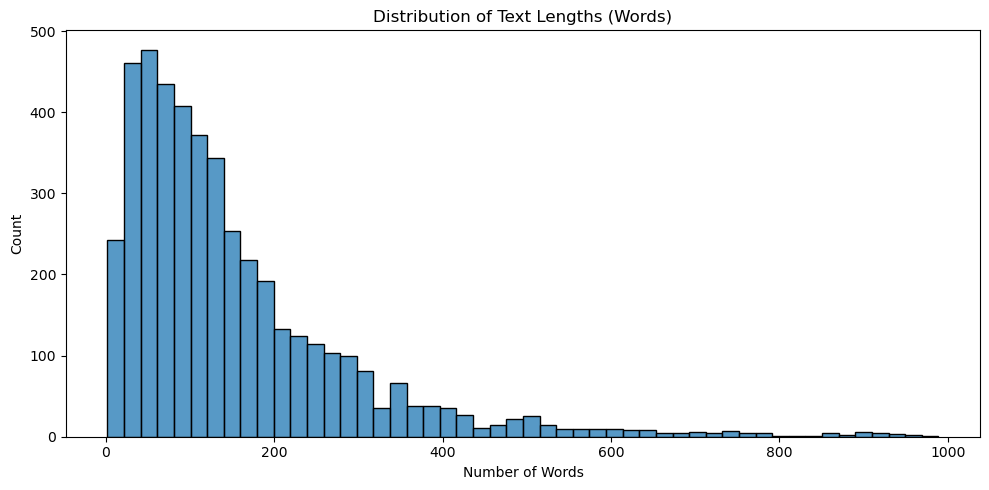


Text Length Statistics:

Word counts:
Average length: 152.2 words
Median length: 112.0 words
Max length: 989 words
Min length: 2 words

Validation Set Text Lengths:


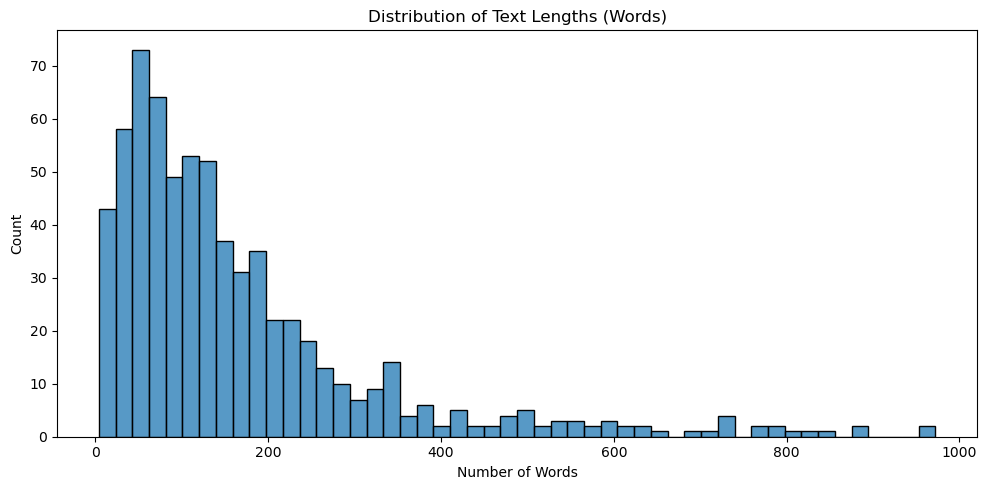


Text Length Statistics:

Word counts:
Average length: 166.4 words
Median length: 119.0 words
Max length: 972 words
Min length: 4 words

Test Set Text Lengths:


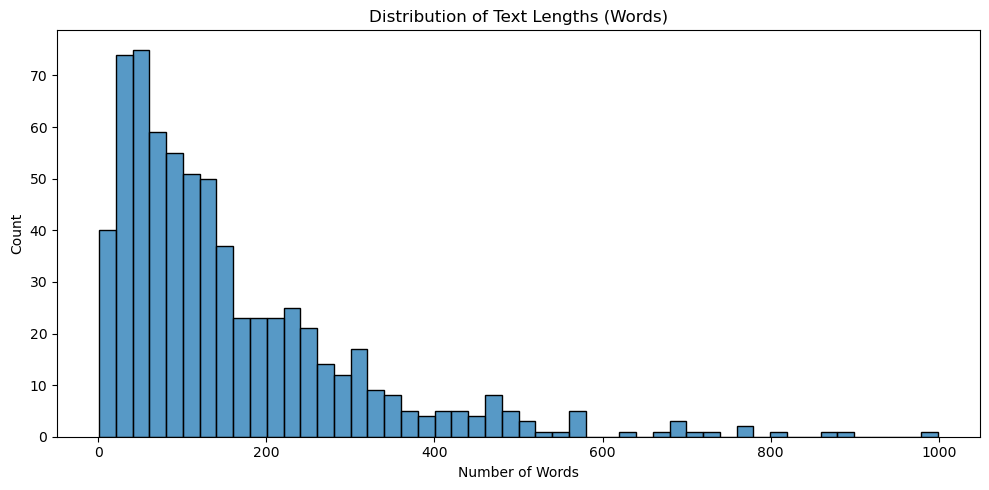


Text Length Statistics:

Word counts:
Average length: 158.2 words
Median length: 113.0 words
Max length: 999 words
Min length: 1 words


In [13]:
print("\nText Length Analysis Across Splits:")
for split_name, split_df in [('Training', train_df), ('Validation', val_df), ('Test', test_df)]:
    print(f"\n{split_name} Set Text Lengths:")
    dataVisualizer.analyze_text_lengths(split_df['text'])

# Cell 7: Token Length Analysis and MAX_LENGTH Recommendation
Tokenized data lengths are analyzed to determine a recommended MAX_LENGTH value for input truncation.
The value is adjusted to align with common model input size requirements.

Token Length Statistics:
Mean: 133.4
Median: 152.0
95th percentile: 192.0
Max: 192


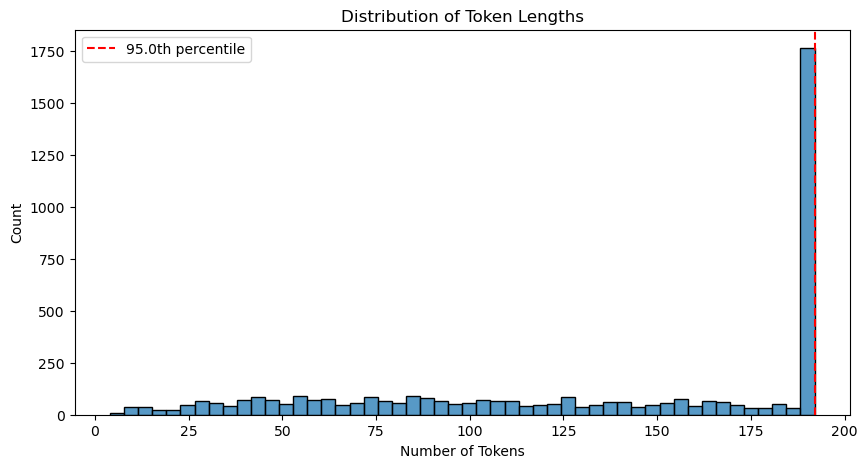


Recommended MAX_LENGTH: 192


In [15]:
encoded_data = trainer.prepare_dataset(train_df['text'])
suggested_length = dataVisualizer.analyze_token_lengths(encoded_data)
MAX_LENGTH = min(512, (suggested_length + 15) // 16 * 16)
print(f"\nRecommended MAX_LENGTH: {MAX_LENGTH}")

# Cell 8: Word Distribution Visualization
Word clouds are generated to visualize the most frequent words in the training data.
This helps identify key terms and potential biases in the data.

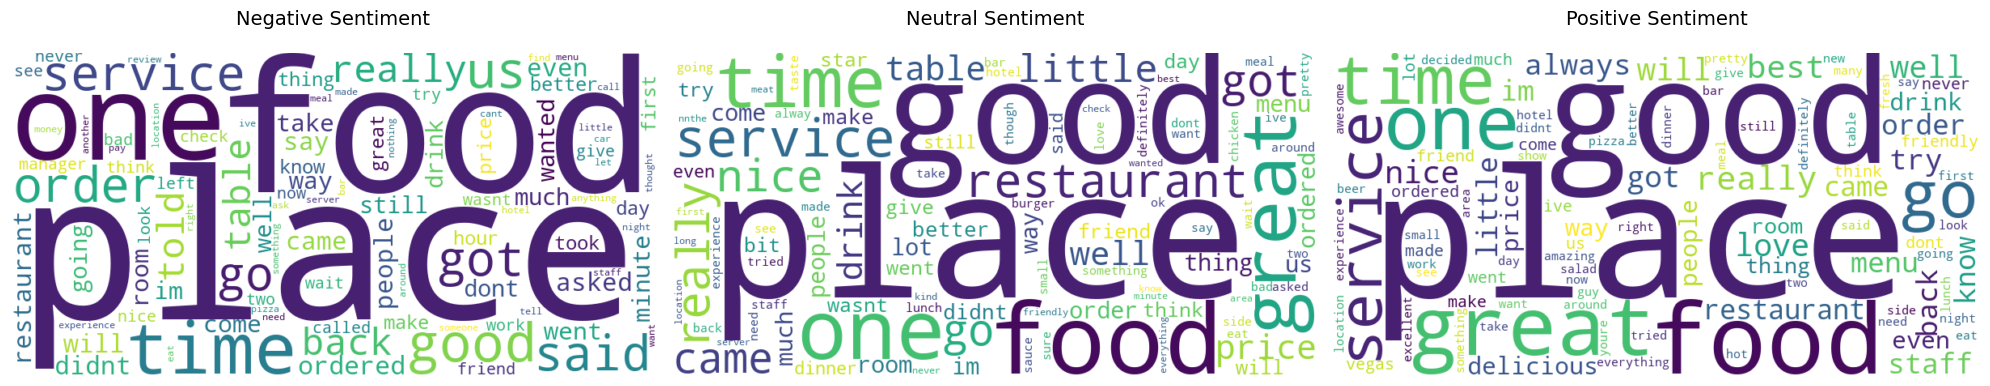


Most Common Words by Sentiment:

Negative:
  the: 13957
  and: 8399
  to: 8027
  was: 5382
  of: 3981
  it: 3646
  that: 3200
  for: 3181
  in: 3093
  my: 2804

Neutral:
  the: 11072
  and: 6293
  to: 4848
  was: 3951
  of: 3381
  it: 3095
  for: 2787
  is: 2551
  in: 2402
  but: 2269

Positive:
  the: 9196
  and: 6745
  to: 4293
  of: 3054
  was: 2881
  is: 2666
  it: 2326
  in: 2246
  for: 2163
  that: 1618


In [17]:
dataVisualizer.visualize_wordclouds(train_df)

# Cell 9:  Sample Reviews Analysis
This cell displays a sample of processed reviews to inspect preprocessing quality.
It ensures that the pipeline handles text properly and removes unwanted artifacts.

In [19]:
dataVisualizer.display_processed_reviews(train_df, num_samples=10)


Review #2323

Original Text:
Seriously- ice cream sandwiches 5 star?NO way! The ice cream gelato is good but the ice cream sandwiches is buttered bread with ice cream UGH! Definitely don't know  what all the hype is about

Processed Text:
seriously- ice cream sandwiches 5 star?no way! the ice cream gelato is good but the ice cream sandwiches is buttered bread with ice cream ugh! definitely do not know what all the hype is about

Labels and Metrics:
- Sentiment: 1 (Neutral)
- Sarcasm Detected: False
- Polarity Score: 0.700

Review #3686

Original Text:
They need a better rain policy.  Standing in an exit line... i mean mob with 7 kids in lightning and pouring rain is not only unsafe but inhumane.  You want us to wait in the rain for 15 to 45 mins to...

Processed Text:
Just what I always wanted: beyond question they need a better rain policy. standing in an exit line ELLIPSIS  i mean mob with 7 kids in lightning and pouring rain is not only unsafe but inhumane. you ...

Labels and Metr

# Cell 10: Data Quality Checks
The training, validation, and testing sets are checked for null values and duplicate rows. This ensures data integrity and quality before model training.

In [23]:
print("Data Quality Checks:")
for split_name, split_df in [('Training', train_df), ('Validation', val_df), ('Test', test_df)]:
    print(f"\n{split_name} Set:")
    print("Null values:")
    print(split_df.isnull().sum())
    print(f"Duplicate rows: {split_df.duplicated().sum()}")

Data Quality Checks:

Training Set:
Null values:
text              0
processed_text    0
sentiment         0
is_sarcastic      0
polarity_score    0
dtype: int64
Duplicate rows: 1776

Validation Set:
Null values:
text              0
processed_text    0
sentiment         0
is_sarcastic      0
polarity_score    0
dtype: int64
Duplicate rows: 0

Test Set:
Null values:
text              0
processed_text    0
sentiment         0
is_sarcastic      0
polarity_score    0
dtype: int64
Duplicate rows: 0
